---

$ETE - 3$

$2347118$ $Hitesh$ $Salimath$

$Question - 2$

---

# Import libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Flatten, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist  # For testing purposes if dataset fails
from tensorflow.keras.preprocessing.image import img_to_array, load_img


# Importing Dataset:

In [2]:
# Define function to load COIL dataset
def load_coil_data(dataset_path, img_size=(128, 128)):
    images = []
    for filename in os.listdir(dataset_path):
        if filename.endswith(".png"):
            img = load_img(os.path.join(dataset_path, filename), target_size=img_size)
            images.append(img_to_array(img) / 255.0)  # Normalize images to [0, 1]
    return np.array(images)

# Load dataset
dataset_path = "/content/drive/MyDrive/coil-20/coil-20-unproc"
images = load_coil_data(dataset_path)


## Split the dataset into training (80%) and testing (20%) sets.

In [3]:
# Split data into training and testing sets
X_train, X_test = train_test_split(images, test_size=0.2, random_state=42)

# Check data shape
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (288, 128, 128, 3)
Testing data shape: (72, 128, 128, 3)


# Model Development:

In [6]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Flatten, Dense, Reshape

# Define the encoder
def build_encoder(input_shape):
    input_layer = Input(shape=input_shape, name="Encoder_Input")
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)  # Downsample
    x = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)  # Downsample
    conv_output = x  # Save the shape after the last Conv2D layer
    x = Flatten()(x)
    latent = Dense(128, activation='relu', name="Latent_Space")(x)
    return Model(input_layer, latent, name="Encoder"), conv_output.shape[1:]

# Define the decoder
def build_decoder(latent_dim, encoded_shape):
    latent_input = Input(shape=(latent_dim,), name="Decoder_Input")
    x = Dense(np.prod(encoded_shape), activation='relu')(latent_input)
    x = Reshape(encoded_shape)(x)
    x = Conv2DTranspose(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)  # Upsample
    x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)  # Upsample
    reconstructed = Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)  # Original dimensions
    return Model(latent_input, reconstructed, name="Decoder")

# Input image dimensions
img_shape = (128, 128, 3)  # Example: 128x128 RGB images

# Build the encoder
encoder, encoded_shape = build_encoder(img_shape)

# Build the decoder
latent_dim = 128
decoder = build_decoder(latent_dim, encoded_shape)

# Combine encoder and decoder to create the autoencoder
input_layer = Input(shape=img_shape, name="Autoencoder_Input")
encoded = encoder(input_layer)
decoded = decoder(encoded)

autoencoder = Model(input_layer, decoded, name="Autoencoder")

# Print a summary of the autoencoder architecture
autoencoder.summary()


Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Autoencoder_Input (InputLayer)       │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Encoder (Functional)                 │ (None, 128)                 │      16,870,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Decoder (Functional)                 │ (None, 128, 128, 3)         │      17,131,395 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,001,987 (129.71 MB)

 Trainable params: 34,001,987 (129.71 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())


# Training:

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 452ms/step - loss: 0.2329 - val_loss: 0.2164
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.1477 - val_loss: 0.0212
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0197 - val_loss: 0.0211
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0197 - val_loss: 0.0212
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0197 - val_loss: 0.0215
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0193 - val_loss: 0.0211
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0191 - val_loss: 0.0209
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0198 - val_loss: 0.0215
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0200 - val_loss: 0.0206
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0200 - val_loss: 0.0208
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0202 - val_loss: 0.0208
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0200 - val_loss: 0.0211

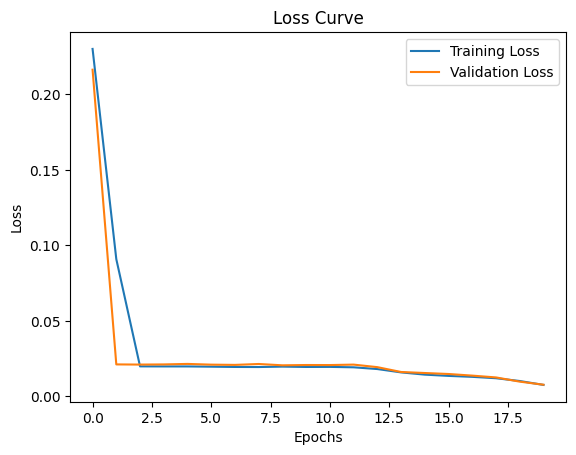

In [8]:
# Train the model
history = autoencoder.fit(
    X_train, X_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, X_test)
)

# Plot training loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluation:

In [9]:
# Evaluate the model on the test set
test_loss = autoencoder.evaluate(X_test, X_test)
print(f"Test MSE Loss: {test_loss}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0078
Test MSE Loss: 0.007779180072247982


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


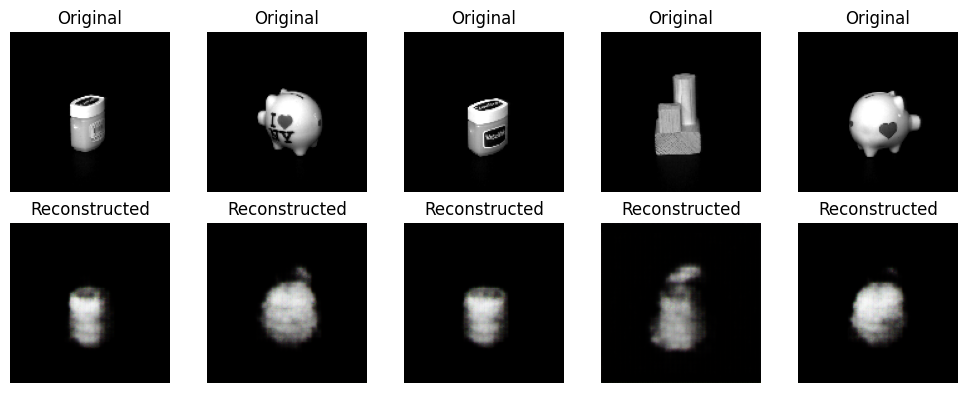

In [10]:
# Visualize original vs. reconstructed images
def visualize_reconstruction(model, test_images, num_images=5):
    reconstructed_images = model.predict(test_images[:num_images])

    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        # Original image
        plt.subplot(2, num_images, i + 1)
        plt.imshow(test_images[i])
        plt.title("Original")
        plt.axis('off')

        # Reconstructed image
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed_images[i])
        plt.title("Reconstructed")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_reconstruction(autoencoder, X_test)

# Deliverables:

## Architecture of the CNN Autoencoder

In [12]:
# Display the architecture of the autoencoder
print("Architecture of the Autoencoder:")
autoencoder.summary()

Architecture of the Autoencoder:


Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Autoencoder_Input (InputLayer)       │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Encoder (Functional)                 │ (None, 128)                 │      16,870,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Decoder (Functional)                 │ (None, 128, 128, 3)         │      17,131,395 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,005,963 (389.12 MB)

 Trainable params: 34,001,987 (129.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68,003,976 (259.41 MB)

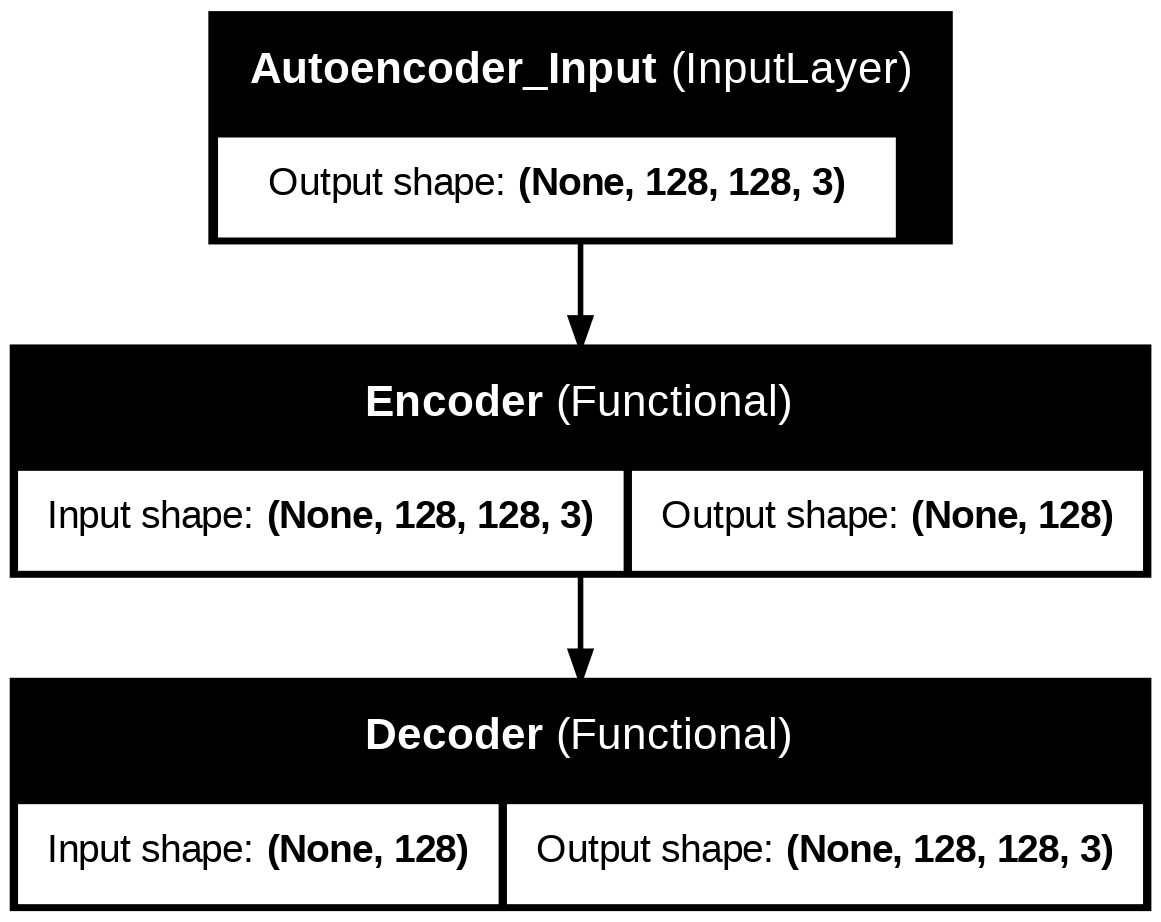

In [11]:
# Generate and save architecture diagram
plot_model(autoencoder, to_file='cnn_autoencoder_architecture.png', show_shapes=True, show_layer_names=True)


## Loss curve during training.

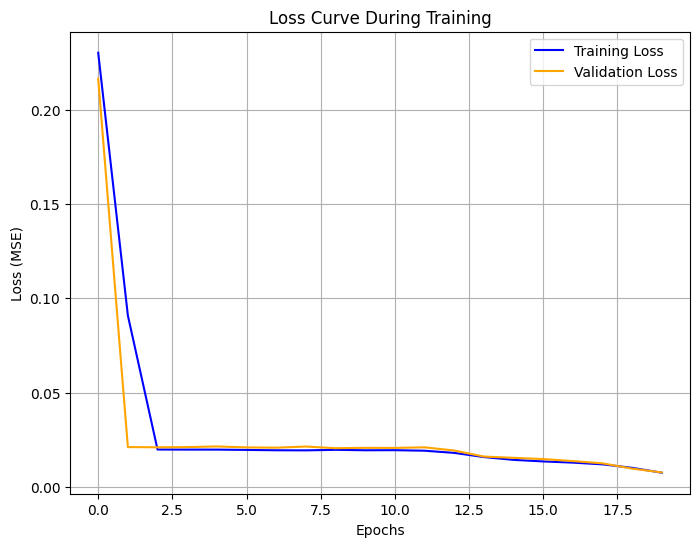

In [13]:
# Plot the training and validation loss curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Curve During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


## Original vs. reconstructed images (at least 5 examples).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


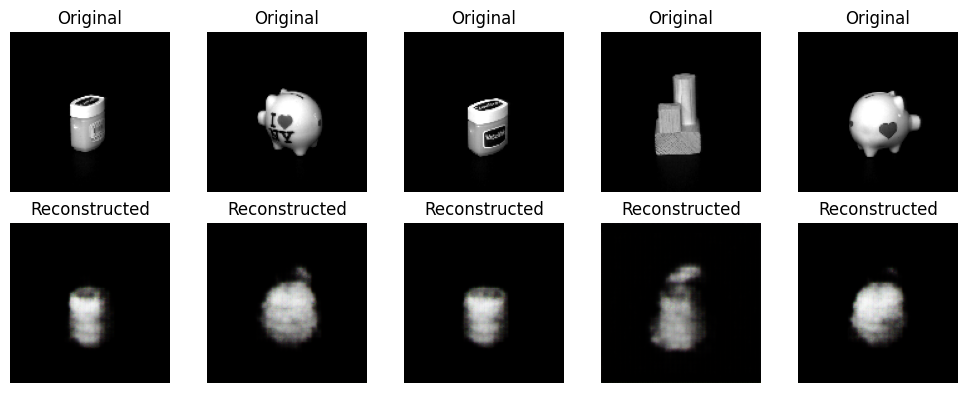

In [14]:
visualize_reconstruction(autoencoder, X_test)

## Final test MSE value.

In [15]:
# Evaluate the model on the test set
test_loss = autoencoder.evaluate(X_test, X_test, verbose=0)
print(f"Final Test MSE Value: {test_loss}")

Final Test MSE Value: 0.007779180072247982
